# Multiplicación

In [1]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
%matplotlib inline

In [2]:
def matrixM(m,n): 
    results = np.zeros((len(m),len(n)))
    for i in range(len(m)):
           for j in range(len(n[0])):
                   for k in range(len(n)):
                           results[i][j] += m[i][k] * n[k][j]
    return results


In [3]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
print m
print n
E=matrixM(m,n)
print E

[[3 2 3]
 [6 2 1]
 [6 3 8]]
[[6 4 4]
 [8 4 4]
 [6 3 2]]
[[  52.   29.   26.]
 [  58.   35.   34.]
 [ 108.   60.   52.]]


In [4]:
class Counter:
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

In [5]:
def acctMatrixM(m,n, acct):
    results = np.zeros((len(m),len(n))); acct.count() 
    acct.count() 
    for i in range(len(m)):
        acct.count() 
        for j in range(len(n[0])):
            acct.count() 
            for k in range(len(n)):
                acct.count() 
                results[i][j] += m[i][k] * n[k][j]; acct.count(); acct.count()   
    return results


In [6]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
acct= Counter()
acctMatrixM(m,n,acct)
acct.print_steps()

Number of steps = 95


In [7]:
def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        m= np.random.randint(9, size=(i,i)) 
        x= np.random.randint(9, size=(i,i)) 
        acct.reset()
        acctMatrixM(m,x,acct)
        results.append(acct.steps)
    print results
    return results

In [8]:
print exper_analysis(10)

[2, 7, 32, 95, 214, 407, 692, 1087, 1610, 2279]
[2, 7, 32, 95, 214, 407, 692, 1087, 1610, 2279]


[2, 7, 32, 95, 214, 407, 692, 1087, 1610, 2279]


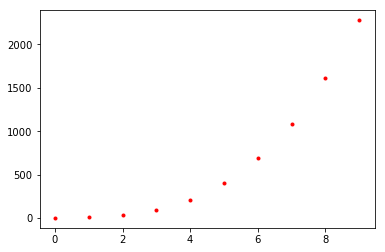

In [9]:
pl.clf()
x = np.arange(10)
y = np.array(exper_analysis(10))
pl.plot(x, y, 'r.')

# Dividir y Conquitar

In [10]:
def suma(m,n):
    t = len(m)
    results = np.zeros((len(m),len(n)))
    for i in range(t):
        for j in range(t):
            results[i][j] = m[i][j] + n[i][j]
    return results

def matrixMDC(m, n):
    bandera=0 
    if (len(m) <= 2):
         return matrixM(m,n)
    else :
        L=len(m)
        if(L%2!=0):
            x = np.zeros((L, 1))
            y = np.zeros((1, L+1))
            m = np.c_[m,x]
            m = np.r_[m,y]
            n = np.c_[n,x]
            n = np.r_[n,y]
            L=L+1    
            bandera=1 
        L= (L)/2
        aa=m[:L,:L]
        ab=m[:L,L:]
        ac=m[L:,:L]
        ad=m[L:,L:]
        ba=n[:L,:L]
        bb=n[:L,L:]
        bc=n[L:,:L]
        bd=n[L:,L:]     
    caa =matrixMDC(aa,ba)
    cab =matrixMDC(ab,bc)
    cba =matrixMDC(aa,bb)
    cbb =matrixMDC(ab,bd)
    cca=matrixMDC(ac,ba)
    ccb =matrixMDC(ad,bc)
    cda =matrixMDC(ac,bb)
    cdb =matrixMDC(ad,bd)
    ca = suma(caa,cab)
    cb = suma(cba,cbb)
    cc = suma(cca,ccb)
    cd = suma(cda,cdb)
    ca = np.c_[ca,cb]
    cc = np.c_[cc,cd]
    ca = np.r_[ca,cc]
    if bandera==1:
        l=len(ca)
        ca = ca[:l-1,:l-1]
    return ca

In [11]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
print m
print n
E=matrixMDC(m,n)
print E

[[8 7 2]
 [3 6 2]
 [0 5 4]]
[[4 3 3]
 [4 0 3]
 [0 2 3]]
[[ 60.  28.  51.]
 [ 36.  13.  33.]
 [ 20.   8.  27.]]


In [12]:
def acctsuma(m,n,acct):
    t = len(m);acct.count()
    results = np.zeros((len(m),len(n)));acct.count()
    for i in range(t):
        acct.count()
        for j in range(t):
            acct.count()
            results[i][j] = m[i][j] + n[i][j];acct.count()
    return results
def acctmatrixMDC(m, n, acct):
    bandera= 0;acct.count() #false
    if (len(m) <= 2):
         return acctMatrixM(m,n,acct)
    else :
        L=len(m);acct.count()
        if(L%2!=0):
            acct.count()
            x = np.zeros((L, 1));acct.count()
            y = np.zeros((1, L+1));acct.count()
            m = np.c_[m,x];acct.count()
            m = np.r_[m,y];acct.count()
            n = np.c_[n,x];acct.count()
            n = np.r_[n,y];acct.count()
            L= L+1 ;acct.count()   
            bandera= 1 ;acct.count() #true 
        L= (L)/2;acct.count()
        aa=m[:L,:L];acct.count()
        ab=m[:L,L:];acct.count()
        ac=m[L:,:L];acct.count()
        ad=m[L:,L:];acct.count()
        ba=n[:L,:L];acct.count()
        bb=n[:L,L:];acct.count()
        bc=n[L:,:L];acct.count()
        bd=n[L:,L:];acct.count()
    caa =acctmatrixMDC(aa,ba,acct);acct.count()
    cab =acctmatrixMDC(ab,bc,acct);acct.count()
    cba =acctmatrixMDC(aa,bb,acct);acct.count()
    cbb =acctmatrixMDC(ab,bd,acct);acct.count()
    cca =acctmatrixMDC(ac,ba,acct);acct.count()
    ccb =acctmatrixMDC(ad,bc,acct);acct.count()
    cda =acctmatrixMDC(ac,bb,acct);acct.count()
    cdb =acctmatrixMDC(ad,bd,acct);acct.count()
    ca = acctsuma(caa,cab,acct);acct.count()
    cb = acctsuma(cba,cbb,acct);acct.count()
    cc = acctsuma(cca,ccb,acct);acct.count()
    cd = acctsuma(cda,cdb,acct);acct.count()
    ca = np.c_[ca,cb];acct.count()
    cc = np.c_[cc,cd];acct.count()
    ca = np.r_[ca,cc];acct.count()
    if bandera==1:
        acct.count()
        l=len(ca);acct.count()
        ca = ca[:l-1,:l-1];acct.count()
    return ca

In [13]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
acct= Counter()
acctmatrixMDC(m,n,acct)
acct.print_steps()

Number of steps = 350


In [14]:
def exper_analysisDC(n):
    results = []
    acct = Counter()
    for i in range(n):
        m = np.random.randint(9,size=(i,i))
        x = np.random.randint(9,size=(i,i))
        acct.reset()
        acctmatrixMDC(m,x,acct)
        results.append(acct.steps)
    return results

In [15]:
print exper_analysisDC(10)

[3, 8, 33, 350, 338, 2930, 2918, 2894, 2882, 23706]


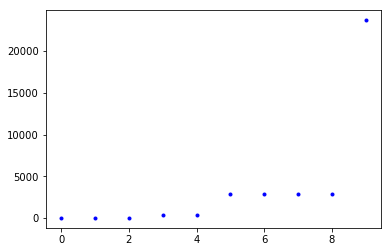

In [16]:
pl.clf()
x = np.arange(10)
y = np.array(exper_analysisDC(10))
pl.plot(x, y, 'b.')

# Algoritmo de Strassen

In [17]:
def resta(m,n):
    t = len(m)
    results = np.zeros((len(m),len(n)))
    for i in range(t):
        for j in range(t):
            results[i][j] = m[i][j] - n[i][j]
    return results

def matrixMS(m, n):
    bandera=0 #false
    if (len(m) <= 2):
         return matrixM(m,n)
    else :
        L=len(m)
        if(L%2!=0):
            x = np.zeros((L, 1))
            y = np.zeros((1, L+1))
            m = np.c_[m,x]
            m = np.r_[m,y]
            n = np.c_[n,x]
            n = np.r_[n,y]
            L=L+1    
            bandera=1 
        L= (L)/2
        aa=m[:L,:L]
        ab=m[:L,L:]
        ac=m[L:,:L]
        ad=m[L:,L:]
        ba=n[:L,:L]
        bb=n[:L,L:]
        bc=n[L:,:L]
        bd=n[L:,L:]      
    maa = suma(aa,ad)
    mab = suma(ba,bd)
    ma  = matrixMS(maa,mab)
    mba = suma(ac,ad)
    mb  = matrixMS(mba,ba)
    mca = resta(bb,bd)
    mc  = matrixMS(aa,mca)
    mda = resta(bc,ba)
    md  = matrixMS(ad,mda)
    mea = suma(aa,ab)
    me = matrixMS(mea,bd)
    mfa = resta(ac,aa)
    mfb = suma(ba,bb)
    mf = matrixMS(mfa,mfb)
    mga = resta(ab,ad)
    mgb = suma(bc,bd)
    mg = matrixMS(mga,mgb)
    ca = suma(ma,md)
    ca = resta(ca,me)
    ca = suma(ca,mg)
    cb = suma(mc,me)
    cc = suma(mb,md)
    cd = resta(ma,mb)
    cd = suma(cd,mc)
    cd = suma(cd,mf)
    ca = np.c_[ca,cb]
    cc = np.c_[cc,cd]
    ca = np.r_[ca,cc]
    if bandera==1:
        l=len(ca)
        ca = ca[:l-1,:l-1]
    return ca

In [18]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
print m
print n
E=matrixMS(m,n)
print E

[[0 2 3]
 [0 2 8]
 [3 6 2]]
[[3 8 3]
 [7 3 0]
 [2 0 3]]
[[ 20.   6.   9.]
 [ 30.   6.  24.]
 [ 55.  42.  15.]]


In [19]:
def acctresta(m,n,acct):
    t = len(m);acct.count()
    results = np.zeros((len(m),len(n)));acct.count()
    for i in range(t):
        acct.count()
        for j in range(t):
            acct.count()
            results[i][j] = m[i][j] - n[i][j];acct.count()
    return results

def acctmatrixMS(m, n,acct):
    bandera=0;acct.count() #false
    if (len(m) <= 2):
        acct.count()
        return acctMatrixM(m,n,acct)
    else :
        L=len(m);acct.count()
        if(L%2!=0):
            acct.count()
            x = np.zeros((L, 1));acct.count()
            y = np.zeros((1, L+1));acct.count()
            m = np.c_[m,x];acct.count()
            m = np.r_[m,y];acct.count()
            n = np.c_[n,x];acct.count()
            n = np.r_[n,y];acct.count()
            L=L+1;acct.count()
            bandera=1;acct.count() 
        L= (L)/2;acct.count()
        aa=m[:L,:L];acct.count()
        ab=m[:L,L:];acct.count()
        ac=m[L:,:L];acct.count()
        ad=m[L:,L:];acct.count()
        ba=n[:L,:L];acct.count()
        bb=n[:L,L:];acct.count()
        bc=n[L:,:L];acct.count()
        bd=n[L:,L:];acct.count()
    maa = acctsuma(aa,ad,acct);acct.count()
    mab = acctsuma(ba,bd,acct);acct.count()
    ma  = acctmatrixMS(maa,mab,acct);acct.count()
    mba = acctsuma(ac,ad,acct);acct.count()
    mb  = acctmatrixMS(mba,ba,acct);acct.count()
    mca = acctresta(bb,bd,acct);acct.count()
    mc  = acctmatrixMS(aa,mca,acct);acct.count()
    mda = acctresta(bc,ba,acct);acct.count()
    md  = acctmatrixMS(ad,mda,acct);acct.count()
    mea = acctsuma(aa,ab,acct);acct.count()
    me = acctmatrixMS(mea,bd,acct);acct.count()
    mfa = acctresta(ac,aa,acct);acct.count()
    mfb = acctsuma(ba,bb,acct);acct.count()
    mf = acctmatrixMS(mfa,mfb,acct);acct.count()
    mga = acctresta(ab,ad,acct);acct.count()
    mgb = acctsuma(bc,bd,acct);acct.count()
    mg = acctmatrixMS(mga,mgb,acct);acct.count()
    ca = acctsuma(ma,md,acct);acct.count()
    ca = acctresta(ca,me,acct);acct.count()
    ca = acctsuma(ca,mg,acct);acct.count()
    cb = acctsuma(mc,me,acct);acct.count()
    cc = acctsuma(mb,md,acct);acct.count()
    cd = acctresta(ma,mb,acct);acct.count()
    cd = acctsuma(cd,mc,acct);acct.count()
    cd = acctsuma(cd,mf,acct);acct.count()
    ca = np.c_[ca,cb];acct.count()
    cc = np.c_[cc,cd];acct.count()
    ca = np.r_[ca,cc];acct.count()
    if bandera==1:
        acct.count()
        l=len(ca);acct.count()
        ca = ca[:l-1,:l-1];acct.count()
    return ca

In [20]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
acct= Counter()
acctmatrixMS(m,n,acct)
acct.print_steps()

Number of steps = 505


In [21]:
def exper_analysisS(n):
    results = []
    acct = Counter()
    for i in range(n):
        m = np.random.randint(9,size=(i,i))
        x = np.random.randint(9,size=(i,i))
        acct.reset()
        acctmatrixMS(m,x,acct)
        results.append(acct.steps)
    return results

In [22]:
print exper_analysisS(10)

[4, 9, 34, 505, 493, 4000, 3988, 4186, 4174, 29077]


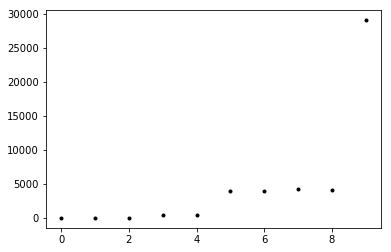

In [23]:
pl.clf()
x = np.arange(10)
y = np.array(exper_analysisS(10))
pl.plot(x, y, 'k.')

In [24]:
# Todas juntas

[2, 7, 32, 95, 214, 407, 692, 1087, 1610, 2279]


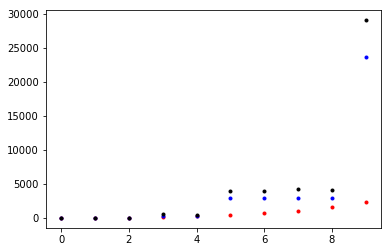

In [25]:
pl.clf()
x = np.arange(10)
y1 = np.array(exper_analysis(10))
y2= np.array(exper_analysisDC(10))
y3 = np.array(exper_analysisS(10))
pl.plot(x, y1, 'r.', x, y2, 'b.', x, y3, 'k.')